# Ejercicio 4.4 (home)


En la inmobiliaria FeelGood han recopilado datos de precios de las casas que han
vendido últimamente.

Les gustaría poder predecir el precio de una casa a partir de los datos que disponen sobre
características de la casa y del barrio donde está situada. Así pueden dar ya un primer
precio de venta sin tener que llevar un tasador.

Las variables que vamos a usar son:
* ID --> Identificador de la casa
* crim --> Tasa de criminalidad per cápita por ciudad.
* zn --> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
* indus --> Proporción de acres de negocios no minoristas por ciudad.
* chas --> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
* nox --> Concentración de óxidos de nitrógeno (partes por 10 millones).
* rm --> Número medio de habitaciones por vivienda.
* age --> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* dis --> Media ponderada de las distancias a cinco centros de empleo de Boston.
* rad --> Indice de accesibilidad a carreteras radiales.
* tax --> Impuesto sobre el valor total de la propiedad por 10.000 dólares.
* ptratio --> Proporción de alumnos por maestro por ciudad.
* black --> 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de color por ciudad.
* lstat --> Vn estatus más bajo de la población (porcentaje).
* medv --> Valor medio de las casas ocupadas por sus dueños en \ 1000 dólares. Será la variable target a predecir

Tenemos 4 ficheros:
* 2 train
* 2 predict

Primero tendremos que hacer un proceso de ETL ya que los datos de la casa están
separados de los datos del barrio (juntar los dos train entre ellos y los dos test entre ellos)
En predict, no tenemos la variable medv, que es la que tenemos que dar como respuesta

## 1.- Importar las librerías de Python necesarias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import itertools
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

## 2.- Proceso de ETL

### Carga de los ficheros de manera individual

In [2]:
PATH_NAME = './data/'
FILE_NAME1 = 'train_1.csv'
FILE_NAME2 = 'train_2.csv'
FILE_NAME3 = 'predict_1.csv'
FILE_NAME4 = 'predict_2.csv'

In [3]:
train1 = pd.read_csv(PATH_NAME+FILE_NAME1, sep=",")
train2 = pd.read_csv(PATH_NAME+FILE_NAME2, sep=",")
predict1 = pd.read_csv(PATH_NAME+FILE_NAME3, sep=",")
predict2 = pd.read_csv(PATH_NAME+FILE_NAME4, sep=",")

### Análisis de los datos por fichero

#### Train1

In [4]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv
0      1  18.0     0  6.575  4.0900    1  296  24.0
1      2   0.0     0  6.421  4.9671    2  242  21.6
2      4   0.0     0  6.998  6.0622    3  222  33.4
3      5   0.0     0  7.147  6.0622    3  222  36.2
4      7  12.5     0  6.012  5.5605    5  311  22.9
..   ...   ...   ...    ...     ...  ...  ...   ...
328  500   0.0     0  5.569  2.3999    6  391  17.5
329  502   0.0     0  6.593  2.4786    1  273  22.4
330  503   0.0     0  6.120  2.2875    1  273  20.6
331  504   0.0     0  6.976  2.1675    1  273  23.9
332  506   0.0     0  6.030  2.5050    1  273  11.9

[333 rows x 8 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
medv    float64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
medv    0
dtype: int64 

Indices estadisticos

                ID          zn      

#### Train2

In [5]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train2.duplicated().any())

Vista del DF

       ID     crim  indus    nox   age  ptratio   black  lstat
0      1  0.00632   2.31  0.538  65.2     15.3  396.90   4.98
1      2  0.02731   7.07  0.469  78.9     17.8  396.90   9.14
2      4  0.03237   2.18  0.458  45.8     18.7  394.63   2.94
3      5  0.06905   2.18  0.458  54.2     18.7  396.90   5.33
4      7  0.08829   7.87  0.524  66.6     15.2  395.60  12.43
..   ...      ...    ...    ...   ...      ...     ...    ...
328  500  0.17783   9.69  0.585  73.5     19.2  395.77  15.10
329  502  0.06263  11.93  0.573  69.1     21.0  391.99   9.67
330  503  0.04527  11.93  0.573  76.7     21.0  396.90   9.08
331  504  0.06076  11.93  0.573  91.0     21.0  396.90   5.64
332  506  0.04741  11.93  0.573  80.8     21.0  396.90   7.88

[333 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

 ID       

#### Predict1

In [6]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax
0      3   0.0     0  7.185  4.9671    2  242
1      6   0.0     0  6.430  6.0622    3  222
2      8  12.5     0  6.172  5.9505    5  311
3      9  12.5     0  5.631  6.0821    5  311
4     10  12.5     0  6.004  6.5921    5  311
..   ...   ...   ...    ...     ...  ...  ...
168  496   0.0     0  5.670  2.7986    6  391
169  497   0.0     0  5.390  2.7986    6  391
170  499   0.0     0  6.019  2.4091    6  391
171  501   0.0     0  6.027  2.4982    6  391
172  505   0.0     0  6.794  2.3889    1  273

[173 rows x 7 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
dtype: int64 

Indices estadisticos

                ID          zn        chas          rm         dis         rad  \
count  173.000000  173.000000  173.000000  173.00000

#### Predict 2

In [7]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict2.duplicated().any())

Vista del DF

       ID     crim  indus    nox    age  ptratio   black  lstat
0      3  0.02729   7.07  0.469   61.1     17.8  392.83   4.03
1      6  0.02985   2.18  0.458   58.7     18.7  394.12   5.21
2      8  0.14455   7.87  0.524   96.1     15.2  396.90  19.15
3      9  0.21124   7.87  0.524  100.0     15.2  386.63  29.93
4     10  0.17004   7.87  0.524   85.9     15.2  386.71  17.10
..   ...      ...    ...    ...    ...      ...     ...    ...
168  496  0.17899   9.69  0.585   28.8     19.2  393.29  17.60
169  497  0.28960   9.69  0.585   72.9     19.2  396.90  21.14
170  499  0.23912   9.69  0.585   65.3     19.2  396.90  12.92
171  501  0.22438   9.69  0.585   79.7     19.2  396.90  14.33
172  505  0.10959  11.93  0.573   89.3     21.0  393.45   6.48

[173 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

### Unificar DataFrames "Train" y "Predict"

#### Train

In [8]:
train = pd.merge(train1,train2,how='inner', on='ID', validate='1:1')
train

,ID,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,1,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,502,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,503,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,504,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


In [9]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv     crim  indus    nox  \
0      1  18.0     0  6.575  4.0900    1  296  24.0  0.00632   2.31  0.538   
1      2   0.0     0  6.421  4.9671    2  242  21.6  0.02731   7.07  0.469   
2      4   0.0     0  6.998  6.0622    3  222  33.4  0.03237   2.18  0.458   
3      5   0.0     0  7.147  6.0622    3  222  36.2  0.06905   2.18  0.458   
4      7  12.5     0  6.012  5.5605    5  311  22.9  0.08829   7.87  0.524   
..   ...   ...   ...    ...     ...  ...  ...   ...      ...    ...    ...   
328  500   0.0     0  5.569  2.3999    6  391  17.5  0.17783   9.69  0.585   
329  502   0.0     0  6.593  2.4786    1  273  22.4  0.06263  11.93  0.573   
330  503   0.0     0  6.120  2.2875    1  273  20.6  0.04527  11.93  0.573   
331  504   0.0     0  6.976  2.1675    1  273  23.9  0.06076  11.93  0.573   
332  506   0.0     0  6.030  2.5050    1  273  11.9  0.04741  11.93  0.573   

      age  ptratio   black  lstat  
0    65.2   

#### Predict

In [10]:
predict = pd.merge(predict1, predict2, how='inner', on='ID', validate='1:1')
predict

,ID,zn,chas,rm,dis,rad,tax,crim,indus,nox,age,ptratio,black,lstat
0,3,0.0,0,7.185,4.9671,2,242,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,6,0.0,0,6.430,6.0622,3,222,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,8,12.5,0,6.172,5.9505,5,311,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,9,12.5,0,5.631,6.0821,5,311,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,10,12.5,0,6.004,6.5921,5,311,0.17004,7.87,0.524,85.9,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.0,0,5.670,2.7986,6,391,0.17899,9.69,0.585,28.8,19.2,393.29,17.60
169,497,0.0,0,5.390,2.7986,6,391,0.28960,9.69,0.585,72.9,19.2,396.90,21.14
170,499,0.0,0,6.019,2.4091,6,391,0.23912,9.69,0.585,65.3,19.2,396.90,12.92
171,501,0.0,0,6.027,2.4982,6,391,0.22438,9.69,0.585,79.7,19.2,396.90,14.33


In [11]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax     crim  indus    nox    age  \
0      3   0.0     0  7.185  4.9671    2  242  0.02729   7.07  0.469   61.1   
1      6   0.0     0  6.430  6.0622    3  222  0.02985   2.18  0.458   58.7   
2      8  12.5     0  6.172  5.9505    5  311  0.14455   7.87  0.524   96.1   
3      9  12.5     0  5.631  6.0821    5  311  0.21124   7.87  0.524  100.0   
4     10  12.5     0  6.004  6.5921    5  311  0.17004   7.87  0.524   85.9   
..   ...   ...   ...    ...     ...  ...  ...      ...    ...    ...    ...   
168  496   0.0     0  5.670  2.7986    6  391  0.17899   9.69  0.585   28.8   
169  497   0.0     0  5.390  2.7986    6  391  0.28960   9.69  0.585   72.9   
170  499   0.0     0  6.019  2.4091    6  391  0.23912   9.69  0.585   65.3   
171  501   0.0     0  6.027  2.4982    6  391  0.22438   9.69  0.585   79.7   
172  505   0.0     0  6.794  2.3889    1  273  0.10959  11.93  0.573   89.3   

     ptratio   black  lstat  
0     

# 3.- Selección de columnas

## Criterio propio

Eliminamos la columna ID, ya que no nos aporta valor para realizar las predicciones, y el target

In [12]:
train = train.drop(columns=['ID'])
train.head()

,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43


## Selección por correlación

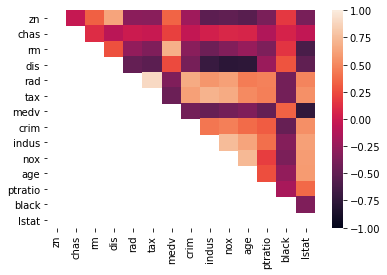

In [13]:
correlation_matrix = train.corr().where(~np.tril(np.ones(train.corr().shape)).astype(np.bool))
correlation_matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,)
plt.show()

In [14]:
correlation_table = correlation_matrix.stack().to_frame().reset_index()
correlation_table['corr_columns'] = correlation_table['level_0'] + ' - ' + correlation_table['level_1']
correlation_table = correlation_table.drop(columns=['level_0', 'level_1'])
correlation_table['values'] = correlation_table[0]
correlation_table = correlation_table[['corr_columns', 'values']]
deltacorr = 0.5
filter_1 = correlation_table['values'] > deltacorr
filter_2 = correlation_table['values'] < -deltacorr

correlation_table_1 = correlation_table.where(filter_1 | filter_2).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_1

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
nox - age,0.736000
tax - indus,0.708313
rm - medv,0.689598
tax - nox,0.670722
rad - crim,0.666636
indus - age,0.638378
zn - dis,0.637142


In [15]:
correlation_table_cols = correlation_table_1.index.str.split(expand=True).to_frame().reset_index(drop=True)[[0,2]]

col1 = set(correlation_table_cols[0])
col2 = set(correlation_table_cols[2])
col1 |= col2

correlated_cols = list(col1)
train_cols = list(train.columns)

print(correlated_cols)
print(len(correlated_cols))

print(train_cols)
print(len(train_cols))

['rad', 'zn', 'medv', 'indus', 'rm', 'lstat', 'crim', 'dis', 'nox', 'age', 'tax']
11
['zn', 'chas', 'rm', 'dis', 'rad', 'tax', 'medv', 'crim', 'indus', 'nox', 'age', 'ptratio', 'black', 'lstat']
14


Podemos ver como tenemos un modelo altamente correlacionado, donde 11 de las 14 columnas que tenemos disponibles para realizar las predicciones presentan una correlación superior al 0,5 (catalogada como alta) con almenos una del resto de columnas.
    
Debido a los valores obtenido augmentaremos nuestro threshold de selección de 0,5 a 0,75.

In [16]:
deltacorr = 0.75
filter_3 = correlation_table['values'] > deltacorr
filter_4 = correlation_table['values'] < -deltacorr

correlation_table_2 = correlation_table.where(filter_3 | filter_4).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_2

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
dis - age,-0.764208
dis - nox,-0.769364


Dadas las siguientes correlaciones decidimos prescindir de las columnas:
* tax, ya que presenta mayor correlación con otras columnas que rad
* age y nox, ya que ambas esta correlacionadas con dis, nox esta correlacionada con indus y ambas presentan un 0.73 de correlación entre ellas (se escapa del threshold definido pero es una correlación notable)

In [17]:
train = train.drop(columns = ["tax", "nox", "age"])
train.head()

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43


# 4.- Limpieza de datos

/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartin

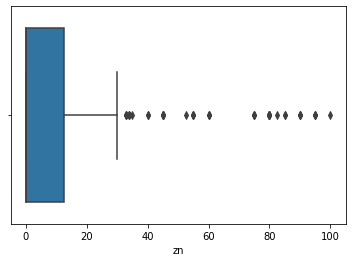

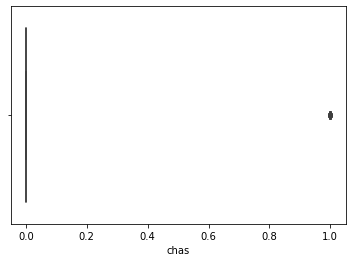

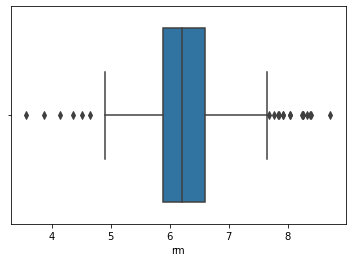

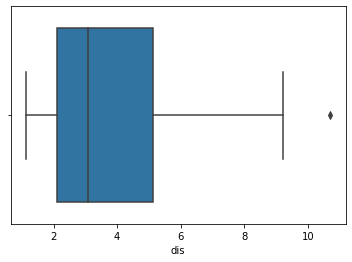

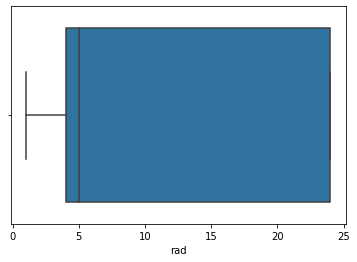

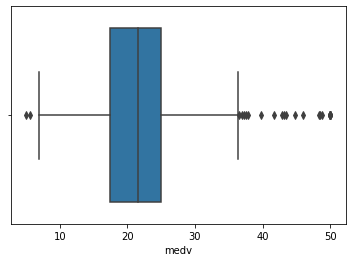

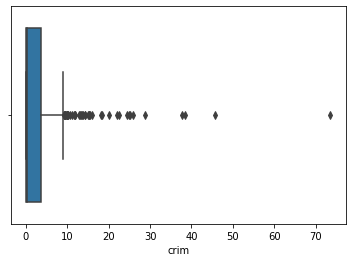

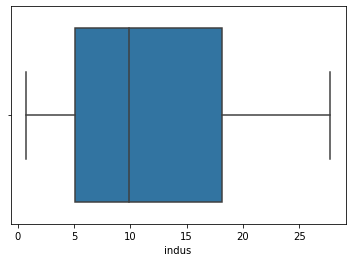

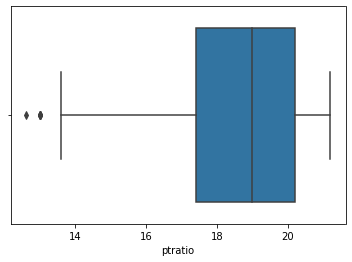

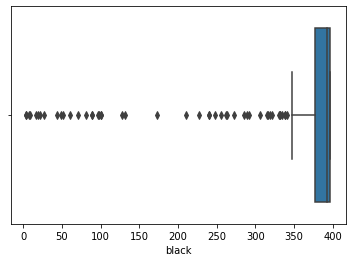

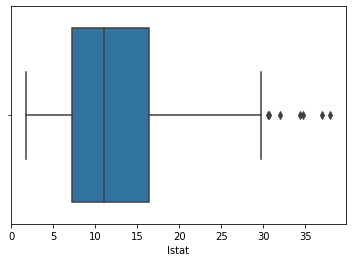

In [18]:
for col in train.columns:
  f, ax_new = plt.subplots(1)
  sns.boxplot(train[col], ax=ax_new)

## Outliers

In [19]:
# Ahora empezamos a eliminar outliers
# Segun el analisis con los Boxplot's, existe una gran cantidad de outliers en las variables "zn"(hacia el max),
# "crim" (hacia el max) y "black" (hacia el min).

meanzn = train['zn'].describe()['mean']
stdzn = train['zn'].describe()['std']
meancrim = train['crim'].describe()['mean']
stdcrim = train['crim'].describe()['std']
meanblack = train['black'].describe()['mean']
stdblack = train['black'].describe()['std']

n = 3 # aca se define la cantidad de sigmas a evaluar

train = train[train['zn']< (meanzn+n*stdzn)] # Se eliminan outliers de 'zn'
train = train[train['crim']< (meancrim+n*stdcrim)] # Se eliminan outliers de 'zn'
train = train[train['black']> (meanblack-n*stdblack)] # Se eliminan outliers de 'zn'
train

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0,5.569,2.3999,6,17.5,0.17783,9.69,19.2,395.77,15.10
329,0.0,0,6.593,2.4786,1,22.4,0.06263,11.93,21.0,391.99,9.67
330,0.0,0,6.120,2.2875,1,20.6,0.04527,11.93,21.0,396.90,9.08
331,0.0,0,6.976,2.1675,1,23.9,0.06076,11.93,21.0,396.90,5.64


# 5.- Entrenar al modelo supervisado de regresion

## Modelo de regresión lineal

### Preparación de los datos

In [20]:
train.columns

Index(['zn', 'chas', 'rm', 'dis', 'rad', 'medv', 'crim', 'indus', 'ptratio',
       'black', 'lstat'],
      dtype='object')

In [21]:
target = train.pop('medv')
target

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 295, dtype: float64

### Regresión lineal simple

"A simple linear regression is a linear regression model with a single explanatory variable"

Vamos a probar que resultados obtenemos al entrenar modelos de regresión lineal usando una sola variable.

Variable = zn
Costo de datos de train 0.06572928178486015
Costo de datos de test 0.08576428379313839
R2 Score -21.2076475041669
MSEE 59.10123589916785
MAE 4.962786231651873


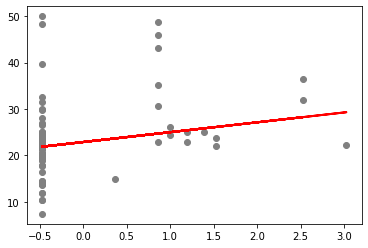





Variable = chas
Costo de datos de train 0.016656165251655364
Costo de datos de test 0.07295272296225308
R2 Score -32.96967085412261
MSEE 59.929445807706756
MAE 5.225779952893934


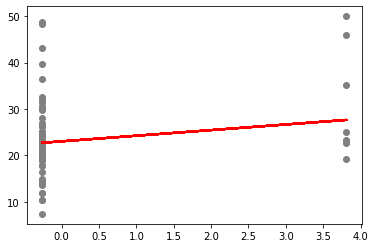





Variable = rm
Costo de datos de train 0.4328540807960598
Costo de datos de test 0.5757709110141653
R2 Score 0.022690085705558527
MSEE 27.424506633219085
MAE 3.3287977516103147


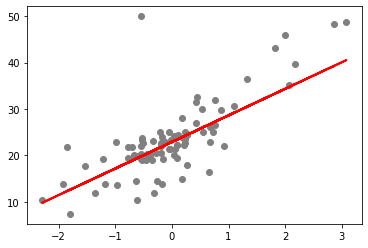





Variable = dis
Costo de datos de train 0.029038614755580783
Costo de datos de test 0.008435600353148498
R2 Score -37.77152877582849
MSEE 64.10018822704302
MAE 5.1894858322807


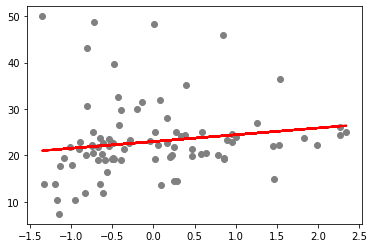





Variable = rad
Costo de datos de train 0.06701305885223774
Costo de datos de test 0.04557927198648681
R2 Score -13.468254274700868
MSEE 61.69901655933446
MAE 5.32713228213209


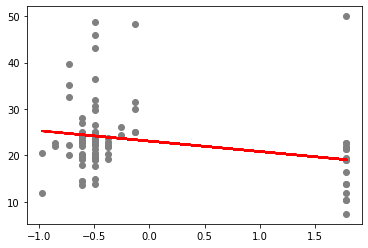





Variable = crim
Costo de datos de train 0.13453958975954894
Costo de datos de test 0.1253411382174744
R2 Score -3.1761428103907257
MSEE 56.54276988431521
MAE 5.002283320576633


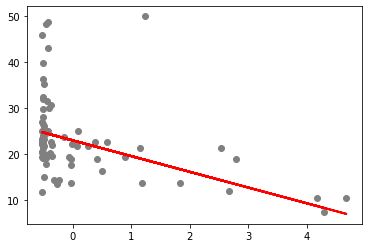





Variable = indus
Costo de datos de train 0.16922493608858546
Costo de datos de test 0.17013755690995436
R2 Score -4.253394982248968
MSEE 53.646882465295256
MAE 5.158326642304095


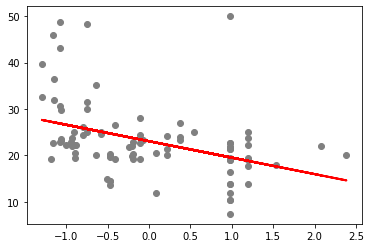





Variable = ptratio
Costo de datos de train 0.19257392008465823
Costo de datos de test 0.1661213759570498
R2 Score -1.919155951392399
MSEE 53.90651053900054
MAE 5.124241296528066


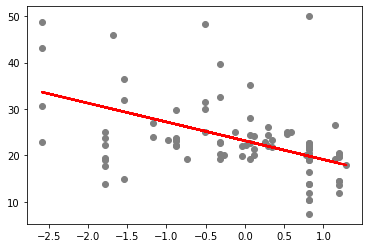





Variable = black
Costo de datos de train 0.03243207803549075
Costo de datos de test 0.0008008868380251499
R2 Score -26.489490313352796
MSEE 64.59373819066944
MAE 5.307366197379528


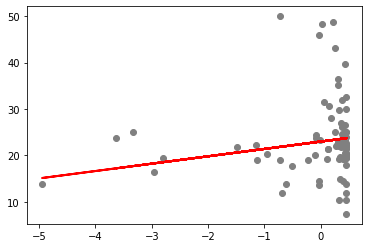





Variable = lstat
Costo de datos de train 0.5401651076771641
Costo de datos de test 0.4016045861082387
R2 Score 0.005169648596570764
MSEE 38.68357786778374
MAE 4.293097222143554


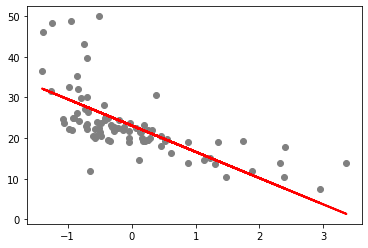

In [22]:
for feature_name in train.columns:
    feature = StandardScaler().fit_transform(train[feature_name].values.reshape((-1, 1)))
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=23)
    
    lr2 = LinearRegression()
    modelo = lr2.fit(X_train, y_train)
    
    print('Variable =',feature_name)    
    print('Costo de datos de train',lr2.score(X_train, y_train))
    y_pred=lr2.predict(X_test)
    print('Costo de datos de test',lr2.score(X_test, y_test))
    print('R2 Score',r2_score(y_pred,y_test))
    print('MSEE',msee(y_test,y_pred))
    print('MAE',mae(y_test,y_pred))
    
    plt.scatter(X_test, y_test,  color='gray')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
    plt.show()
    
    
    print('\n\n\n')
    

Podemos ver como con una sola variable los resultados de aplicar una regressión lineal no son acceptables. Por ese motivo, optamos por probar regressiones lineales multiples con todas las combinaciones posibles de nuestras variables features.

### Regresión lineal multiple

In [23]:
feature_names = train.columns
feature_names

Index(['zn', 'chas', 'rm', 'dis', 'rad', 'crim', 'indus', 'ptratio', 'black',
       'lstat'],
      dtype='object')

In [24]:
multiple_linear_regression_results = pd.DataFrame(columns=['Variables', 'Score train', 'Score test', 'R2 Score', 'MSEE', 'MAE'])
multiple_linear_regression_results.head()

,Variables,Score train,Score test,R2 Score,MSEE,MAE


Eligimos un valor de partición pequeño (0.15) debido al reducido numero de muestras que tenemos. Preferimos maximizar el numero de datos que usamos para entrenar los modelos.

In [25]:
for n in range(2, len(feature_names)+1):
    for features_subset in itertools.combinations(feature_names, n):
        features_array = np.asarray(features_subset)
        
        features = StandardScaler().fit_transform(train[features_array])
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=23)
        
        lr2 = LinearRegression()
        modelo = lr2.fit(X_train, y_train)
        
        y_pred = lr2.predict(X_test)
        y_test = y_test.values
        
        res_temp = pd.DataFrame([
            [' - '.join(features_array), 
             lr2.score(X_train, y_train), 
             lr2.score(X_test, y_test), 
             r2_score(y_pred,y_test), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
        ], columns=['Variables', 'Score train', 'Score test', 'R2 Score', 'MSEE', 'MAE'])
        
        multiple_linear_regression_results = multiple_linear_regression_results.append(res_temp)

multiple_linear_regression_results = multiple_linear_regression_results.reset_index(drop=True)

In [26]:
# Top 10 combinaciones con mejor score de train
multiple_linear_regression_results.sort_values(by='Score train', ascending=False).head(10)

,Variables,Score train,Score test,R2 Score,MSEE,MAE
1012,zn - chas - rm - dis - rad - crim - indus - pt...,0.653182,0.773439,0.650955,16.066163,2.955914
1003,zn - chas - rm - dis - rad - crim - indus - pt...,0.653031,0.773563,0.651090,16.057425,2.967521
1006,zn - chas - rm - dis - rad - indus - ptratio -...,0.652769,0.768820,0.643871,16.393754,2.987855
964,zn - chas - rm - dis - rad - indus - ptratio -...,0.652594,0.768907,0.643894,16.387587,3.000629
1005,zn - chas - rm - dis - rad - crim - ptratio - ...,0.651822,0.757737,0.620513,17.179663,3.053642
966,zn - chas - rm - dis - rad - ptratio - black -...,0.651572,0.754817,0.616396,17.386725,3.079670
961,zn - chas - rm - dis - rad - crim - ptratio - ...,0.651507,0.756795,0.618523,17.246502,3.068047
1007,zn - chas - rm - dis - crim - indus - ptratio ...,0.651426,0.760013,0.630794,17.018273,3.031887
968,zn - chas - rm - dis - crim - indus - ptratio ...,0.651331,0.760283,0.631168,16.999145,3.040759
971,zn - chas - rm - dis - indus - ptratio - black...,0.651249,0.759969,0.630895,17.021381,3.028230


In [27]:
# Top 10 combinaciones con mejor score de test
multiple_linear_regression_results.sort_values(by='Score test', ascending=False).head(10)

,Variables,Score train,Score test,R2 Score,MSEE,MAE
921,chas - rm - dis - rad - crim - indus - ptratio,0.517964,0.820427,0.723596,12.734110,2.880123
957,zn - chas - rm - dis - rad - crim - indus - pt...,0.521695,0.819364,0.732034,12.809497,2.897585
993,chas - rm - dis - rad - crim - indus - ptratio...,0.518040,0.817739,0.720551,12.924697,2.898332
1002,zn - chas - rm - dis - rad - crim - indus - pt...,0.521793,0.816352,0.728739,13.023111,2.917799
773,chas - rm - rad - crim - indus - ptratio,0.505987,0.813990,0.692557,13.190616,2.885666
857,zn - chas - rm - rad - crim - indus - ptratio,0.506007,0.813851,0.692679,13.200440,2.886640
936,chas - rm - rad - crim - indus - ptratio - black,0.506075,0.811405,0.689544,13.373861,2.905034
972,zn - chas - rm - rad - crim - indus - ptratio ...,0.506096,0.811245,0.689654,13.385277,2.906234
757,chas - rm - dis - rad - indus - ptratio,0.497782,0.805904,0.699013,13.763995,2.912946
520,chas - rm - rad - indus - ptratio,0.489930,0.804678,0.677852,13.850900,2.904513


In [28]:
multiple_linear_regression_results['Media scores'] = (multiple_linear_regression_results['Score train'] + multiple_linear_regression_results['Score test'])/2
multiple_linear_regression_results.sort_values(by='Media scores', ascending=False).head(10)

,Variables,Score train,Score test,R2 Score,MSEE,MAE,Media scores
1012,zn - chas - rm - dis - rad - crim - indus - pt...,0.653182,0.773439,0.650955,16.066163,2.955914,0.713311
1003,zn - chas - rm - dis - rad - crim - indus - pt...,0.653031,0.773563,0.651090,16.057425,2.967521,0.713297
1006,zn - chas - rm - dis - rad - indus - ptratio -...,0.652769,0.768820,0.643871,16.393754,2.987855,0.710795
964,zn - chas - rm - dis - rad - indus - ptratio -...,0.652594,0.768907,0.643894,16.387587,3.000629,0.710750
1011,chas - rm - dis - rad - crim - indus - ptratio...,0.650840,0.766622,0.633553,16.549616,3.048069,0.708731
994,chas - rm - dis - rad - crim - indus - ptratio...,0.650663,0.766713,0.633593,16.543131,3.058631,0.708688
997,chas - rm - dis - rad - indus - ptratio - blac...,0.650576,0.763044,0.628201,16.803333,3.074335,0.706810
928,chas - rm - dis - rad - indus - ptratio - lstat,0.650379,0.763082,0.628113,16.800624,3.086254,0.706730
968,zn - chas - rm - dis - crim - indus - ptratio ...,0.651331,0.760283,0.631168,16.999145,3.040759,0.705807
1007,zn - chas - rm - dis - crim - indus - ptratio ...,0.651426,0.760013,0.630794,17.018273,3.031887,0.705719


Nos quedamos con la combinación con indice 1012. Nos proporciona los mejores de predicción con los datos de testing y, también, es la combinación más equilibrada entre los resultados de entrenamiento y testeo.

Seguidamente, le aplicamos cross validation para ver si conseguimos mejorar los resultados obtenidos hasta el momento.

### Modelo de regresión lineal con Cross Validation

In [29]:
optimal_feature_names = multiple_linear_regression_results.loc[1012]['Variables'].split(" - ")
optimal_feature_names

['zn',
 'chas',
 'rm',
 'dis',
 'rad',
 'crim',
 'indus',
 'ptratio',
 'black',
 'lstat']

In [30]:
optimal_features = StandardScaler().fit_transform(train[optimal_feature_names])

X_train, X_test, y_train, y_test = train_test_split(optimal_features, target, test_size=0.15)

clr = LinearRegression()

kf = KFold(n_splits=5)

modelo = clr.fit(X_train, y_train)

print('Score train',modelo.score(X_train, y_train))

scores = cross_val_score(modelo, X_train, y_train, cv=kf)

print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())


predicciones=clr.predict(X_test)

print('Score test', clr.score(X_test, y_test))
print('R2 Score',r2_score(predicciones,y_test))
print('MSEE',msee(y_test,predicciones))
print('MAE',mae(y_test,predicciones))

Score train 0.7025588494979753
Metricas cross_validation [0.68835222 0.61318972 0.57109261 0.75009974 0.72349128]
Media de cross_validation 0.6692451144837012
Score test 0.45065838737964636
R2 Score 0.4653893794886652
MSEE 35.06615978116921
MAE 4.359099195993699


Los resultados con cross validation no nos mejoran. Optamos por probar otro tipo de algoritmos de regresión en busca de mejores resultados.

## Regression polinomial

In [31]:
polinomial_regression_results = pd.DataFrame(columns=['Variables', 'Degree', 'Score train', 'Score test', 'R2 Score', 'MSEE', 'MAE'])
polinomial_regression_results.head()

,Variables,Degree,Score train,Score test,R2 Score,MSEE,MAE


In [32]:
for n in range(2, len(feature_names)+1):
    for features_subset in itertools.combinations(feature_names, n):
        features_array = np.asarray(features_subset)
        
        features = StandardScaler().fit_transform(train[features_array])
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=23)
        
        X_poly_train = PolynomialFeatures(degree=int(n)).fit_transform(X_train)
        X_poly_test = PolynomialFeatures(degree=int(n)).fit_transform(X_test)

        lin_reg = LinearRegression()
        modelo = lin_reg.fit(X_poly_train, y_train)
        
        y_pred = modelo.predict(X_poly_test)
        y_test = y_test.values
        
        res_temp = pd.DataFrame([
            [' - '.join(features_array), 
             n,
             modelo.score(X_poly_train, y_train), 
             modelo.score(X_poly_test, y_test), 
             r2_score(y_pred,y_test), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
        ], columns=['Variables', 'Degree', 'Score train', 'Score test', 'R2 Score', 'MSEE', 'MAE'])
        
        polinomial_regression_results = polinomial_regression_results.append(res_temp) 

In [33]:
# Top 10 combinaciones con mejor score de train
polinomial_regression_results.sort_values(by='Score train', ascending=False).head(10)

,Variables,Degree,Score train,Score test,R2 Score,MSEE,MAE
0,zn - chas - rm - dis - rad - crim - indus - pt...,10,1.0,-1.024712e+06,-0.058365,7.266577e+07,2199.460971
0,chas - rm - rad - indus - black - lstat,6,1.0,-1.565535e+05,-0.034009,1.110180e+07,664.157506
0,chas - rm - dis - indus - ptratio - lstat,6,1.0,-2.872671e+06,-0.000433,2.037107e+08,4282.430315
0,chas - rm - dis - indus - black - lstat,6,1.0,-2.549570e+05,-0.026009,1.807992e+07,755.026326
0,chas - rm - dis - ptratio - black - lstat,6,1.0,-1.474858e+05,-0.020376,1.045878e+07,644.828739
0,chas - rm - rad - crim - indus - black,6,1.0,-3.280669e+07,-0.024530,2.326431e+09,9022.029918
0,chas - rm - rad - crim - indus - lstat,6,1.0,-7.151142e+04,-0.014369,5.071183e+06,788.885932
0,chas - rm - rad - crim - ptratio - black,6,1.0,-7.151355e+07,-0.029427,5.071263e+09,12387.707824
0,chas - rm - rad - crim - ptratio - lstat,6,1.0,-7.274374e+05,-0.035987,5.158507e+07,2272.284722
0,chas - rm - rad - crim - black - lstat,6,1.0,-1.814563e+07,-0.017446,1.286767e+09,6618.630718


In [34]:
# Top 10 combinaciones con mejor score de test
polinomial_regression_results.sort_values(by='Score test', ascending=False).head(10)

,Variables,Degree,Score train,Score test,R2 Score,MSEE,MAE
0,rm - rad - lstat,3,0.826810,0.868635,0.853412,9.315540,2.387035
0,rm - crim - lstat,3,0.829273,0.856524,0.807095,10.174360,2.377107
0,rm - indus - lstat,3,0.798885,0.831677,0.755474,11.936331,2.498678
0,rm - dis - indus,3,0.599212,0.815917,0.771656,13.053936,2.887058
0,zn - rm - black,3,0.575132,0.814770,0.803457,13.135267,2.855317
0,zn - rm - ptratio,3,0.597968,0.812719,0.814483,13.280725,2.918030
0,rm - indus,2,0.556705,0.811929,0.756883,13.336741,2.945622
0,rm - ptratio,2,0.583875,0.811857,0.796914,13.341815,2.886486
0,rm - crim - ptratio,3,0.650230,0.810853,0.786707,13.413061,2.890438
0,rm - dis - ptratio,3,0.607247,0.810358,0.804829,13.448127,2.920328


In [35]:
polinomial_regression_results['Media scores'] = (polinomial_regression_results['Score train'] + polinomial_regression_results['Score test'])/2
polinomial_regression_results.sort_values(by='Media scores', ascending=False).head(10)

,Variables,Degree,Score train,Score test,R2 Score,MSEE,MAE,Media scores
0,rm - rad - lstat,3,0.826810,0.868635,0.853412,9.315540,2.387035,0.847722
0,rm - crim - indus - lstat,4,0.913973,0.774555,0.794191,15.987021,2.626119,0.844264
0,rm - crim - lstat,3,0.829273,0.856524,0.807095,10.174360,2.377107,0.842899
0,rm - indus - lstat,3,0.798885,0.831677,0.755474,11.936331,2.498678,0.815281
0,rm - dis - lstat,3,0.825173,0.793952,0.690806,14.611527,2.559583,0.809563
0,rm - dis - indus - lstat,4,0.848025,0.764412,0.787122,16.706327,2.912804,0.806219
0,dis - crim - indus - lstat,4,0.876408,0.700316,0.638478,21.251603,3.607814,0.788362
0,zn - rm - black - lstat,4,0.817934,0.745836,0.623404,18.023591,3.074198,0.781885
0,rm - black - lstat,3,0.766297,0.793702,0.691087,14.629281,2.942597,0.779999
0,chas - rm - lstat,3,0.764839,0.787062,0.671040,15.100132,2.790803,0.775951


## Random Forest

In [36]:
random_forest_results = pd.DataFrame(columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for a in range(100,1100,100):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
    rf3 = RandomForestRegressor(n_estimators = int(a), random_state = 42)
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(a),
             rf3.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    random_forest_results = random_forest_results.append(res_temp)

random_forest_results = random_forest_results.reset_index(drop=True)

In [37]:
# Combinaciones de resultados de Random Forest
random_forest_results.sort_values(by='Score train', ascending=False)

,"Valor de ""n""",Score train,R2 Score,MSEE,MAE
1,200,0.974385,0.858426,9.152143,2.208640
5,600,0.974133,0.857174,9.233088,2.203912
9,1000,0.973980,0.857255,9.227803,2.196164
3,400,0.973905,0.858872,9.123289,2.188857
6,700,0.973836,0.858075,9.174822,2.194159
2,300,0.973821,0.858923,9.119995,2.189532
7,800,0.973712,0.859043,9.112268,2.188065
8,900,0.973671,0.858378,9.155258,2.191302
4,500,0.973578,0.856952,9.247418,2.196784
0,100,0.971764,0.855491,9.341829,2.210798


## Neural Net

### Variando numero de iteraciones y con una sola capa de 100 neuronas

In [38]:
net_results = pd.DataFrame(columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for i in range(500,1200,100):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)
    net = MLPRegressor(random_state=1, max_iter=i).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(i),
             net.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    net_results = net_results.append(res_temp)

net_results.reset_index(drop=True)

/home/emartino/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/emartino/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/emartino/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/emartino/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged 

,Cantidad de iteraciones,Score train,R2 Score,MSEE,MAE
0,500,0.780274,0.747776,23.360915,3.725430
1,600,0.812633,0.764547,21.807627,3.578625
2,700,0.835724,0.766173,21.657016,3.556223
3,800,0.850283,0.765208,21.746425,3.558711
4,900,0.862170,0.770749,21.233195,3.478841
5,1000,0.870937,0.764183,21.841320,3.522342
6,1100,0.879303,0.760913,22.144166,3.538163


### 100 neuronas totales, 900 iteraciones y variando el numero de capas

In [39]:
distribuciones = [(60,40,), (50,30,20,), (40,30,20,10,)]

for n in range(1,4):
    hidden_layer_sizes = distribuciones[n-1]
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)
    net = MLPRegressor(random_state=n, max_iter=900, hidden_layer_sizes=hidden_layer_sizes).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    print('Score del entrenamiento',net.score(X_train,y_train))
    print('R2 Score',r2_score(y_pred,y_test))
    print('\n\n')

Score del entrenamiento 0.9331381171169536
R2 Score 0.7368908116990462



Score del entrenamiento 0.8932267660192368
R2 Score 0.6785112448826026



Score del entrenamiento 0.8562996225872608
R2 Score 0.6761296595614072





## Modelos sin variable "black"

### Random Forest 
##### Particion de datos de train y variando n

In [40]:
train1 = train.drop(columns = 'black')
features2 = StandardScaler().fit_transform(train1)
random_forest_results1 = pd.DataFrame(columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for a in range(100,1000,100):
    X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.3)
    rf3 = RandomForestRegressor(n_estimators = int(a), random_state = 42)
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)
    res_temp = pd.DataFrame([[ 
             str(a),
             rf3.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    random_forest_results1 = random_forest_results1.append(res_temp)

In [41]:
# Combinaciones de resultados de Random Forest
random_forest_results1.sort_values(by='R2 Score', ascending=False)

,"Valor de ""n""",Score train,R2 Score,MSEE,MAE
0,400,0.970223,0.874309,11.852517,2.519421
0,100,0.961767,0.868126,11.907856,2.316506
0,600,0.972089,0.846218,13.788749,2.599361
0,900,0.972521,0.834549,13.501047,2.583708
0,200,0.978804,0.806340,13.599103,2.589680
0,500,0.978832,0.805187,11.442727,2.562452
0,700,0.978868,0.796877,10.527865,2.165990
0,800,0.982617,0.787773,11.684591,2.452471
0,300,0.977186,0.772560,16.065932,2.733367


### Neural Net
##### Variando numero de iteraciones, solo una capa con 100 neuronas

In [44]:
net_results = pd.DataFrame(columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for i in range(500,1200,100):
    X_train, X_test, y_train, y_test = train_test_split(features2, target, random_state=1)
    net = MLPRegressor(random_state=1, max_iter=i).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(i),
             net.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    net_results = net_results.append(res_temp)

net_results.reset_index(drop=True)

/home/emartino/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/emartino/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/emartino/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/emartino/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged 

,Cantidad de iteraciones,Score train,R2 Score,MSEE,MAE
0,500,0.775298,0.785497,19.867204,3.328820
1,600,0.799526,0.796339,18.863061,3.254110
2,700,0.817200,0.807323,17.845743,3.180827
3,800,0.830230,0.812796,17.338782,3.118320
4,900,0.837014,0.813634,17.261215,3.112025
5,1000,0.837014,0.813634,17.261215,3.112025
6,1100,0.837014,0.813634,17.261215,3.112025


# Resultados